# Dataset STUDENT PERFORMANCE de Kaggle
Este dataset contiene diferentes características sobre 10.000 estudiantes, todas relacionadas con sus estudios o factores que pueden influir en el rendimiento de los mismos. <br>
[Enlace al dataset en Kaggle.](https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression)

🧠 **Hipótesis**: Unas malas calificaciones inducirán un bajo rendimiento y viceversa. <br>
🎯 **Objetivo**: Predecir el rendimiento del estudiante en función de sus notas anteriores.

1. Carga y análisis exploratorio de los datos (EDA) del dataset.
2. Prepara los datos (seleccionando una sola variable para regresión simple).
3. Entrena un modelo de regresión lineal.
4. Visualiza la relación entre la variable predictora y la variable a predecir.

📈 **Regresión simple**: ¿Cómo influyen las notas anteriores de un estudiante (`Previous Scores`) en su rendimiento general (`Performance Index`)?

## Importación de librerías
Primeramente procedemos a importar las librerías de todas las herramientas que utilizaremos en el desarrollo de este modelo.

In [25]:
%matplotlib inline
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import statsmodels.api as sm

## Carga y análisis exploratorio de los datos (EDA)
### Elección de la variable objetivo
Primeramente debemos cargar los datos y realizar un análisis exploratorio (EDA) sobre los mismos para sacar conclusiones y conocerlos mejor. <br>
Al tratarse se una regresión simple, debemos elegir una variable la cual nos servirá para predecir nuestra variable objetivo. Para ello sacamos la matriz de correlación de todas las variables predictoras frente a la variable a predecir.

In [26]:
# Carga el CSV con todas las columnas
df = pd.read_csv("Student_Performance.csv")

# Obtenemos información sobre las variables predictoras
print(df.info())
print(df.describe())

# Cabecera del dataset
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB
None
       Hours Studied  Previous Scores   Sleep Hours  \
count   10000.000000     10000.000000  10000.000000   
mean        4.992900        69.445700      6.530600   
std         2.589309        17.343152      1.695863   
min         1.000000        40.000000      4.000000   
25%         3.000000        54.000000      5.

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


Para poder crear la matriz de correlación todas las variables deben de ser numéricas, pero podemos observar que tenemos una categórica (``Extracurricular Activities``). Procedemos a observar sus valores para encodearlos.

In [27]:
# Valores únicos de la columna categórica
print(df['Extracurricular Activities'].unique())

['Yes' 'No']


Ya que sus valores son solo de 'Yes' o 'No' (Binario) basta con mapearlo con 1 y 0.

In [28]:
# Mepeamos los valores a 0 y 1
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes':1, 'No':0})

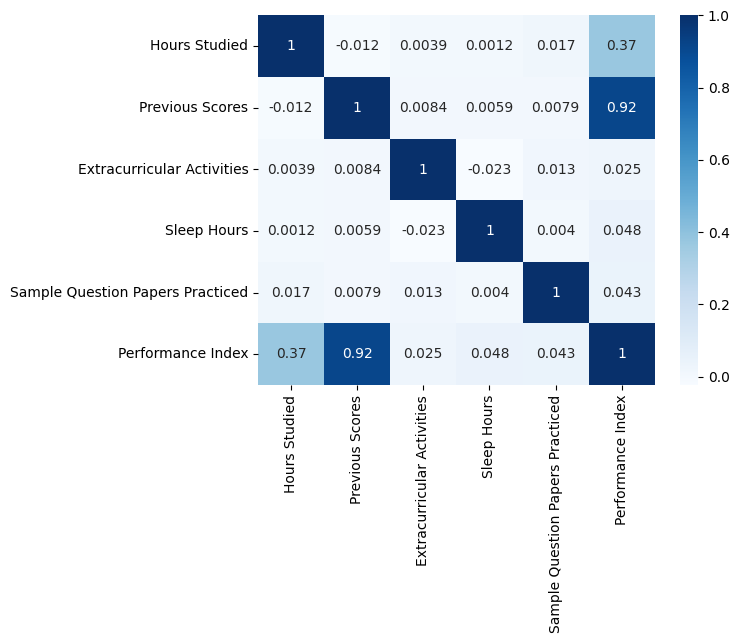

In [29]:
# Crea la matriz de correlación
corr_mtrx = df.corr()

# Muestra la matriz de correlación
sns.heatmap(data=corr_mtrx, annot=True, cmap='Blues')
plt.show()

Se puede apreciar que la correlación más alta frente a nuestra variable objetivo la posee ``Previous Scores`` con un valor de ``(0.92)``.
### Información general del dataset

In [30]:
# Cargamos el CSV solamente con la variable objetivo y la variable predictora en un DataFrame
df = pd.read_csv("Student_Performance.csv", usecols=['Previous Scores','Performance Index'])

# Analisis exploratorio de los datos (EDA)
print(df.info())
print(df.describe())
profile = ProfileReport(df)
# profile.to_file("student_performace.html")
profile

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Previous Scores    10000 non-null  int64  
 1   Performance Index  10000 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 156.4 KB
None
       Previous Scores  Performance Index
count     10000.000000       10000.000000
mean         69.445700          55.224800
std          17.343152          19.212558
min          40.000000          10.000000
25%          54.000000          40.000000
50%          69.000000          55.000000
75%          85.000000          71.000000
max          99.000000         100.000000


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 2/2 [00:00<00:00, 399.95it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Visualización de valores atípicos (Outliers)

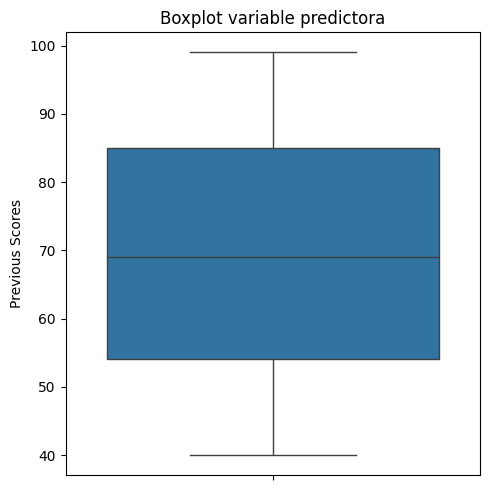

In [31]:
# Visualización de outliers en los datos
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5))
sns.boxplot(df['Previous Scores'], ax=ax)
plt.title("Boxplot variable predictora")
plt.tight_layout()
plt.show()

### Visualización de distrubición de los datos

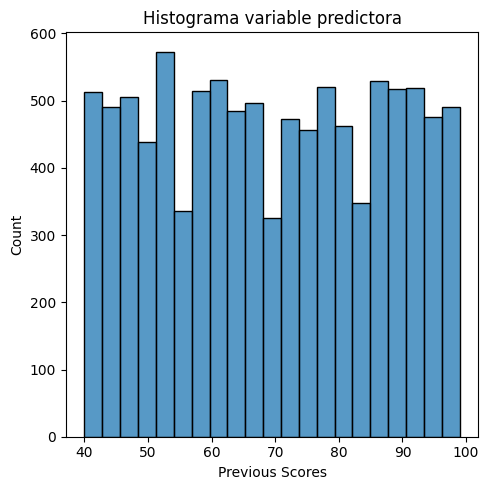

In [32]:
# Visualización de outliers en los datos
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5))
sns.histplot(df['Previous Scores'], ax=ax)
plt.title("Histograma variable predictora")
plt.tight_layout()
plt.show()

### Conclusiones del EDA
- Los datos **NO** presentan **valores nulos** (NaN).
- Existen **1702** (17%) de registros **duplicados**.
- La variable predictora **NO** presenta outliers significativos.
- Ambas variables muestran una **buena distribución de datos**, obteniedo puntuaciones en el **coeficiente de asimetría** muy cercanas a **0** (``0.0045016831``, ``-0.0017400273``)
- La variable predictora (`Previous Scores`) y la variable a predecir (`Performance Index`) presentan una muy alta correlación entre sí (`0.921`)

## Limpieza de datos
En este caso, la limpieza a realizar es bastante escueta debido a que:

-   Las variables no presentan outliers significativos o no representativos.
-   No hay valores nulos (NaN) 

Lo único que tendriamos que limpiar de nuestros datos serían los registros duplicados, los cuales por el momento vamos a conservar para observar si el eliminarlos afecta al rendimiento de nuestro modelo.

In [33]:
# Eliminación de duplicados
# df = df.drop_duplicates()

## Preprocesamiento de los datos
En este caso no es necesario aplicar un escalado a las variables numéricas predictoras ya que solo tenemos una. No existen diversas escalas en los datos.

## División de datos

In [ ]:
# Definimos la variable predictora y la variable a predecir
X = df[['Performance Index']] # Última nota del alumno
y = df['Performance Index'] # Índice de rendmiento del alumno

# Dividimos los datos en sets de entramineto y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Entrenamiento del modelo

Error MAE: 6.56 (puntos de progresión)
R²: 0.841
RMSE: 7.68
MAPE: 14.77%
                            OLS Regression Results                            
Dep. Variable:      Performance Index   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                 4.098e+04
Date:                Sat, 21 Jun 2025   Prob (F-statistic):               0.00
Time:                        13:41:20   Log-Likelihood:                -27742.
No. Observations:                8000   AIC:                         5.549e+04
Df Residuals:                    7998   BIC:                         5.550e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------

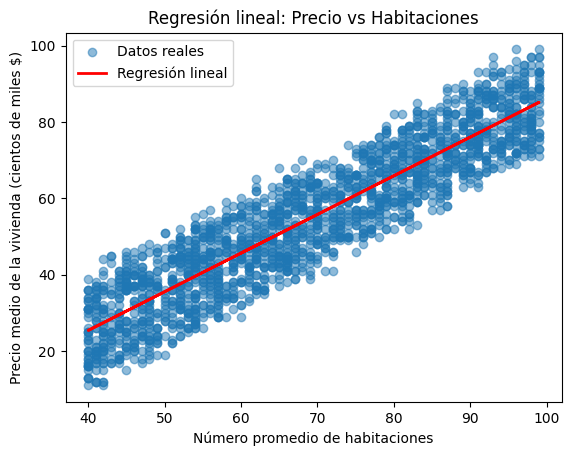

In [35]:
# Entrenar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Hacer predicciones
y_pred = modelo.predict(X_test)

# Evaluar el modelo
# Calculamos el Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Error MAE: {mae:.2f} (puntos de progresión)")
# Calculamos el Coeficiente de determinación
r2 = r2_score(y_test, y_pred)
print(f"R²: {r2:.3f}")
# Calculamos el error cuadratico medio
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f}")
# Calculamos el Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"MAPE: {mape:.2f}%")
# Calculo de la prueba F y P-valor
X_train_const = sm.add_constant(X_train)  # Agregar término de intercepto
modelo_stats = sm.OLS(y_train, X_train_const).fit()
print(modelo_stats.summary())  # Muestra F, p-valor y otros coeficientes

# Representar la relación entre la variable y el precio
plt.scatter(X_test, y_test, label="Datos reales", alpha=0.5)
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Regresión lineal")
plt.xlabel("Número promedio de habitaciones")
plt.ylabel("Precio medio de la vivienda (cientos de miles $)")
plt.title("Regresión lineal: Precio vs Habitaciones")
plt.legend()
plt.show()

### Interpretación de los resultados obtenidos
Los valores de las métricas de evaluación obtenidas son las siguientes:
- **MAE** (Error cuadrático medio): 6.56 -> Indica que el modelo es capaz de predecir el rendimiento de un alumno con un margen de error de 6.56 puntos.
- **MAPE** (Error cuadrático medio porcentual): 14.77% -> Indica lo mismo que el MAE pero en valor porcentual. El modelo se equivoca en promedio en un 14.77% frente al valor predicho.
-   **RMSE** (Raíz del error cuadrático medio): 7.68 -> Expresa lo mismo que el MAE pero teniendo en cuenta valores atípicos si los hubiese (En nuestro caso como las distribuciones de nuestros datos son muy buenas esta métrica no aporta mucha información). 
- **R²**: 0.841 -> El modelo es capaz de explicar un 84.1% de la variabilidad de las notas de rendimiento de los alumnos.
- **Prob (F-statistic)**: 0.00 -> Un p-valor bajo (< 0.05) indica que la relación entre X e y es estadísticamente significativa.

### Entrenamiento sin duplicados
Se realiza el mismo entrenamiento del modelo pero eliminando los duplicados para observar como afecta esto al rendimiento del mismo.

Error MAE: 8.04 (puntos de progresión)
R²: 0.785
RMSE: 9.24
MAPE: 17.87%
                            OLS Regression Results                            
Dep. Variable:      Performance Index   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     5631.
Date:                Sat, 21 Jun 2025   Prob (F-statistic):               0.00
Time:                        13:42:13   Log-Likelihood:                -5387.5
No. Observations:                1488   AIC:                         1.078e+04
Df Residuals:                    1486   BIC:                         1.079e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------

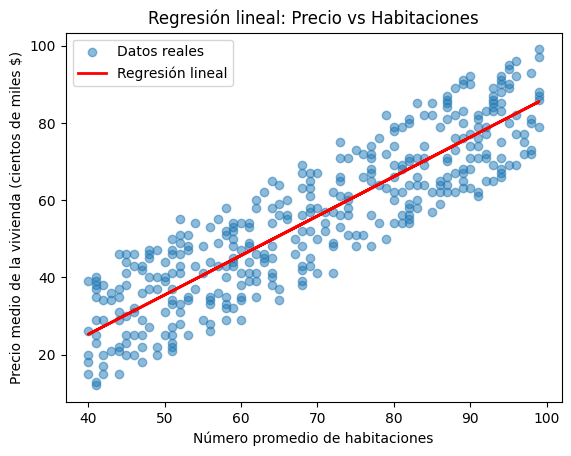

In [37]:
# Eliminar duplicados
df = df.drop_duplicates()

# Definimos la variable predictora y la variable a predecir
X = df[['Previous Scores']] # Última nota del alumno
y = df['Performance Index'] # Índice de rendmiento del alumno

# Dividimos los datos en sets de entramineto y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Hacer predicciones
y_pred = modelo.predict(X_test)

# Evaluar el modelo
# Calculamos el Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Error MAE: {mae:.2f} (puntos de progresión)")
# Calculamos el Coeficiente de determinación
r2 = r2_score(y_test, y_pred)
print(f"R²: {r2:.3f}")
# Calculamos el error cuadratico medio
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f}")
# Calculamos el Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"MAPE: {mape:.2f}%")
# Calculo de la prueba F y P-valor
X_train_const = sm.add_constant(X_train)  # Agregar término de intercepto
modelo_stats = sm.OLS(y_train, X_train_const).fit()
print(modelo_stats.summary())  # Muestra F, p-valor y otros coeficientes

# Representar la relación entre la variable y el precio
plt.scatter(X_test, y_test, label="Datos reales", alpha=0.5)
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Regresión lineal")
plt.xlabel("Número promedio de habitaciones")
plt.ylabel("Precio medio de la vivienda (cientos de miles $)")
plt.title("Regresión lineal: Precio vs Habitaciones")
plt.legend()
plt.show()

### Interpretación de los resultados obtenidos
Los valores de las métricas de evaluación obtenidas son las siguientes:
- **MAE** (Error cuadrático medio): 8.04 -> Indica que el modelo es capaz de predecir el rendimiento de un alumno con un margen de error de 8.04 puntos.
- **MAPE** (Error cuadrático medio porcentual): 17.87% -> Indica lo mismo que el MAE pero en valor porcentual. El modelo se equivoca en promedio en un 17.87% frente al valor predicho.
-   **RMSE** (Raíz del error cuadrático medio): 9.24 -> Expresa lo mismo que el MAE pero teniendo en cuenta valores atípicos si los hubiese (En nuestro caso como las distribuciones de nuestros datos son muy buenas esta métrica no aporta mucha información). 
- **R²**: 0.785 -> El modelo es capaz de explicar un 78.5% de la variabilidad de las notas de rendimiento de los alumnos.
- **Prob (F-statistic)**: 0.00 -> Un p-valor bajo (< 0.05) indica que la relación entre X e y es estadísticamente significativa.

### Comparativa de resultados

|            | **MAE**        | **MAPE**       | **RMSE** | **R²** | **Prob (F-statistic)** |
|:----------:|:--------------:|:--------------:|:--------:|:------:|:----------------------:|
|**CON DUPLICADOS**| 6.56 | 14.77% | 7.68 |  84.1%  |   0.00 |
|**SIN DUPLICADOS**| 8.04 | 17.87% | 9.24 |  78,5%  |   0.00 |



### Conclusión
El modelo entrenado con los registros duplicados presenta un mejor rendimiento frente al modelo sin los duplicados tanto en las predicciones con en las métricas. <br>
Este es un resultado lógico ya que, en este caso de estudio, los duplicados son datos representativos. Varios alumnos pueden tener la misma nota en ambas variables.